# 🧵 Fashion Classification using CNN

Training a Convolutional Neural Network (CNN) to classify images of fashion items from the Fashion MNIST dataset.

In [ ]:
# 📦 Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [ ]:
# 📥 Step 2: Load and Explore the Data
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN input
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 🧠 Step 3: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ⚙️ Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 🏋️ Step 5: Train the Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7650 - loss: 0.6537 - val_accuracy: 0.8609 - val_loss: 0.3817
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8802 - loss: 0.3280 - val_accuracy: 0.8818 - val_loss: 0.3315
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8983 - loss: 0.2779 - val_accuracy: 0.8980 - val_loss: 0.2823
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9123 - loss: 0.2402 - val_accuracy: 0.8982 - val_loss: 0.2833
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9193 - loss: 0.2162 - val_accuracy: 0.8997 - val_loss: 0.2790
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9280 - loss: 0.1972 - val_accuracy: 0.9052 - val_loss: 0.2654
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9346 - loss: 0.1763 - val_accuracy: 0.9068 - val_loss: 0.2692
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9407 - loss: 0.157

In [ ]:
# 📈 Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9078 - loss: 0.2907

Test Accuracy: 0.9078


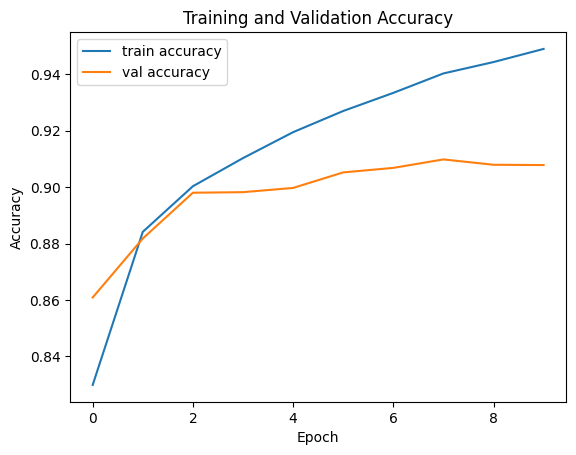

In [ ]:
# 📊 Step 7: Visualize Training Results
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


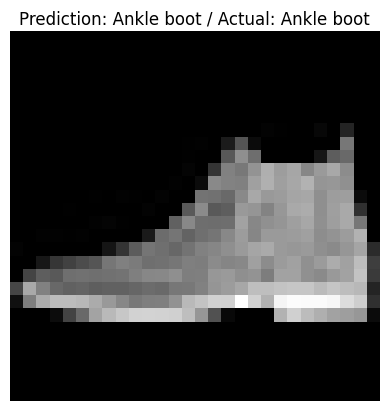

In [ ]:
# 🔍 Step 8: Make Predictions
predictions = model.predict(test_images)

# Show one prediction
i = 0
plt.imshow(test_images[i].reshape(28,28), cmap='gray')
plt.title(f"Prediction: {class_names[np.argmax(predictions[i])]} / Actual: {class_names[test_labels[i]]}")
plt.axis('off')
plt.show()
